# Missing Column Experiment to show that space is sufficient for nice column growth

Simulations from Chaste are saved to 

`$CHASTE_TEST_OUTPUT + output_directory`

based on the environment variable `$CHASTE_TEST_OUTPUT`.

In addition to setting `$CHASTE_TEST_OUTPUT`, the path also needs to be directly edited in `MesenchymalCondensationSimulation.cpp`, `CartilageSheetSimulation.cpp` and `MissingColumnSimulation.cpp` for the apps, as well as `distribute_executable.py` for the postprocessing scripts. 

In [1]:
%%bash
cd ../chaste_build/
make MissingColumnSimulation

[  5%] Built target timekeeper
[ 11%] Built target chaste_global
[ 16%] Built target chaste_linalg
[ 16%] Built target chaste_io
[ 22%] Built target chaste_ode
[ 38%] Built target chaste_mesh
[ 44%] Built target chaste_pde
[ 88%] Built target chaste_cell_based
[100%] Built target chaste_project_cartilage
[100%] Built target MissingColumnSimulation


In [1]:
import sys
sys.path.append('../analysis')
sys.path.append('../')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'xx-large',
          'ytick.labelsize':'xx-large',
          'legend.fontsize': 'xx-large',
          'font.size': 12,
          'axes.titlepad': 12,
          'axes.labelpad': 12,
          'font.family': 'serif',
          'mathtext.fontset': 'cm',
         }
plt.rcParams.update(params)

defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# path_to_label_files = '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/picked_result_files/'
path_to_plots = 'data/plots/'

## Run simulations and post-processing

In [15]:
output_directory = 'exp-draft/cartilage_sheet/missing_column/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = '' 
#flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 80.0' # final time 80h
flags = flags + ' --sw 5' # 5 cells in x direction (The missing column experiment is currently hard-coded for 5 cells in x-dir)
flags = flags + ' --sd 5' # 5 cells in y direction (The missing column experiment is currently hard-coded for 5 cells in y-dir)
flags = flags + ' --sh 5' # 5 cells in z direction
flags = flags + ' --pu 0' # no layer perichondrial cells above
flags = flags + ' --pl 1' # 1 layer perichondrial cells below
flags = flags + ' --nb 2' # both an upper and a lower rigid boundary
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0.0 
#flags = flags + ' --A 0.25' # proliferation rate of 25%
flags = flags + ' --F pwq' # PWQ force
flags = flags + ' --mu_R 20.0' # set repulsive spring stiffness to 20.0
flags = flags + ' --p 0.1' # set perturbation to 0.1
flags = flags + ' --psl 5'
flags = flags + ' --u 4.0' # set distance between boundaries to 3.0
#flags = flags + ' --cg ' # use a Cartesian grid for initial placement
flags = flags + ' --sc 1.075' # scale initial sheet to generate more space
flags = flags + ' --g1t 10.0' # g1 duration for transit cells
flags = flags + ' --g1s 10.0' # g1 duration for stem cells
flags = flags + ' --ds 3.0' # s phase duration

#flags = flags + ' --rdd' #random division directions

executable='/home/kubuntu1804/Documents/chaste_build/projects/CartilageCBM/apps/MissingColumnSimulation'

In [16]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=20, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MissingColumnSimulation --output-dir exp-draft/cartilage_sheet/missing_column/20220612-151424/ --S 0 --T 80.0 --sw 5 --sd 5 --sh 5 --pu 0 --pl 1 --nb 2 --mu 0.0 --F pwq --mu_R 20.0 --p 0.1 --psl 5 --u 4.0 --sc 1.075 --g1t 10.0 --g1s 10.0 --ds 3.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MissingColumnSimulation --output-dir exp-draft/cartilage_sheet/missing_column/20220612-151424/ --S 1 --T 80.0 --sw 5 --sd 5 --sh 5 --pu 0 --pl 1 --nb 2 --mu 0.0 --F pwq --mu_R 20.0 --p 0.1 --psl 5 --u 4.0 --sc 1.075 --g1t 10.0 --g1s 10.0 --ds 3.0
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MissingColumnSimulation --output-dir exp-draft/cartilage_sheet/missing_column/20220612-151424/ --S 2 --T 80.0 --sw 5 --sd 5 --sh 5 --pu 0 --pl 1 --nb 2 --mu 0.0 --F pwq --mu_R 20.0 --p 0.1 --psl 5 --u 4.0 --sc 1.075 --g1t 10.0 --g1s 10.0 --ds 3.0
nice -n 19 /home/kubuntu1804/Do

In [2]:
#output_directory = 'exp-baseline/20210428-095510/'

In [17]:
de.run_postprocessing_multiple_random_seeds(20, output_directory)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/missing_column/20220612-151424/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/missing_column/20220612-151424/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/missing_column/20220612-151424/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/missing_column/20220612-151424/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/missing_column/20220612-151424/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/missing_column/20220612-151424/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartilage_sheet/missing_column/20220612-151424/6/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-draft/cartila

analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:105: RuntimeWarning: All-NaN slice encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:106: RuntimeWarning: All-NaN slice encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.nanmin(coordinates[:,2::3], axis=1))
analysis/evaluate_cartilage_sheet.py:235: RuntimeWarning: Mean of empty slice
  ppa_mean = np.nanmean(ppa, axis=0)
/home/kubuntu1804/.local/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:105: Runti

## Generate figures

Data:
- 20 random seeds,
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/MissingColumnSimulation --output-dir exp-draft/cartilage_sheet/missing_column/20220612-151424/ --S 0 --T 80.0 --sw 5 --sd 5 --sh 5 --pu 0 --pl 1 --nb 2 --mu 0.0 --F pwq --mu_R 20.0 --p 0.1 --psl 5 --u 4.0 --sc 1.075 --g1t 10.0 --g1s 10.0 --ds 3.0

In [2]:
dir_missing_column = 'data/cartilage_sheet/missing_column/20220612-151424/'
n_seeds = 10
dir_comparison = 'data/mesenchymal_condensation/psl5/20220610-104855/'


# # save label-path tuple
# with open(path_to_label_files+'missing_column', 'w') as f:
#     f.write(dir_missing_column+'0/')
    

In [3]:
import matplotlib.image as mpimg

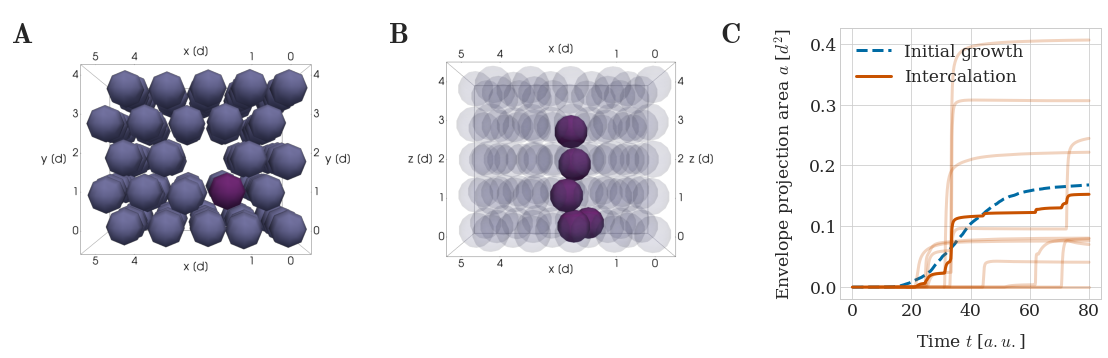

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                                             figsize=(14,5), sharey='col', sharex='col',
                                             gridspec_kw={ 'hspace': 0.001, 'wspace':0.00001},
                                             #tight_layout=True
                                            )

initial = mpimg.imread('data/cartilage_sheet/missing_column/20220612-151424/2/whole_sheet_+z_t0.png')
#crop
initial = initial[150:-150, 480:-480]
ax1.imshow(initial)
#ax1.grid(False)
ax1.axis('off')
ax1.annotate(r'$\bf A$', (0.01, 0.88), xycoords='figure fraction', fontsize=28)
ll, bb, ww, hh = ax1.get_position().bounds 
ax1.set_position([ll-1.4*ww, bb-0.2*hh, ww*1.45, hh*1.45])


xy = mpimg.imread('data/cartilage_sheet/missing_column/20220612-151424/2/column_only_-y_t80.png')
#crop
xy = xy[150:-150, 480:-480]
ax2.imshow(xy)
#ax1.grid(False)
ax2.axis('off')
#ax2.set_title(r'$\bf b$', loc='left', fontsize=28)
ax2.annotate(r'$\bf B$', (0.35, 0.88), xycoords='figure fraction', fontsize=28)
ll, bb, ww, hh = ax2.get_position().bounds 
ax2.set_position([ll-ww, bb-0.2*hh, ww*1.45, hh*1.45])

# Compare with column growth, psl =5
# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_comparison + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
#for seed in range(6):
for seed in range(8):
    #print(seed)
    ppa = np.loadtxt(dir_comparison+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    #plt.plot(times_d, ppa, color=defcolors[5], alpha=0.5)
    ppa_av_d = ppa_av_d + ppa
ppa_av_d = ppa_av_d /8
ax3.plot(times_d, ppa_av_d, color=defcolors[0], label='Initial growth', linestyle='--')

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data(dir_missing_column+ '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
#for seed in range(6):
for seed in range(n_seeds):
    #print(seed)
    ppa = np.loadtxt(dir_missing_column+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
    ax3.plot(times_d, ppa, color=defcolors[5], alpha=0.25)
    ppa_av_d = np.nansum(np.vstack((ppa_av_d, ppa)), axis=0)
ppa_av_d = ppa_av_d /n_seeds
ax3.plot(times_d, ppa_av_d, color=defcolors[5], label='Intercalation')

#plt.legend()
ax3.set_xlabel('Time $t$ [$a.u.$]')
ax3.set_ylabel('Envelope projection area $a$ [$d^2$]')
ax3.legend(loc=2)
#ax3.set_title('(c) Insertion into available space')
ax3.annotate(r'$\bf C$', (0.65, 0.88), xycoords='figure fraction', fontsize=28)

ll, bb, ww, hh = ax3.get_position().bounds 
ax3.set_position([ll-0.2*ww, bb, ww, hh])

plt.savefig(path_to_plots+'missing_column_example.pdf', bbox_inches='tight', dpi=600)
plt.savefig(path_to_plots+'Fig12.pdf', bbox_inches='tight', dpi=600)